In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from collections import Counter
import re
from wordcloud import WordCloud
import requests
from bs4 import BeautifulSoup
import time
from textblob import TextBlob
import warnings
warnings.filterwarnings('ignore')

In [2]:
# Load dataset
df = pd.read_csv('link artikel.csv')

print("=== MEMULAI SCRAPING BERITA ===")
print(f"Total link yang akan di-scrape: {len(df)}")

=== MEMULAI SCRAPING BERITA ===
Total link yang akan di-scrape: 285


In [3]:
# Fungsi untuk scraping berita
def scrape_article(url):
    try:
        headers = {
            'User-Agent': 'Mozilla/5.0 (Windows NT 10.0; Win64; x64) AppleWebKit/537.36 (KHTML, like Gecko) Chrome/91.0.4472.124 Safari/537.36'
        }

        response = requests.get(url, headers=headers, timeout=10)
        response.encoding = 'utf-8'

        if response.status_code == 200:
            soup = BeautifulSoup(response.text, 'html.parser')

            # Ekstrak judul
            title = soup.find('title')
            title_text = title.get_text().strip() if title else 'No Title'

            # Ekstrak konten berita (sesuaikan selector berdasarkan website)
            content = ""

            # Untuk Kompas
            if 'kompas.com' in url:
                article_body = soup.find('div', {'class': 'read__content'})
                if article_body:
                    paragraphs = article_body.find_all('p')
                    content = ' '.join([p.get_text().strip() for p in paragraphs])

            # Untuk Detik
            elif 'detik.com' in url:
                article_body = soup.find('div', {'class': 'detail__body-text'})
                if article_body:
                    paragraphs = article_body.find_all('p')
                    content = ' '.join([p.get_text().strip() for p in paragraphs])

            # Untuk CNBC Indonesia
            elif 'cnbcindonesia.com' in url:
                article_body = soup.find('div', {'class': 'detail-text'})
                if article_body:
                    paragraphs = article_body.find_all('p')
                    content = ' '.join([p.get_text().strip() for p in paragraphs])

            # Fallback: cari semua paragraf
            if not content:
                paragraphs = soup.find_all('p')
                content = ' '.join([p.get_text().strip() for p in paragraphs if len(p.get_text().strip()) > 50])

            return {
                'title': title_text,
                'content': content,
                'word_count': len(content.split()),
                'scrape_success': True
            }
        else:
            return {
                'title': 'Scrape Failed',
                'content': '',
                'word_count': 0,
                'scrape_success': False
            }

    except Exception as e:
        print(f"Error scraping {url}: {str(e)}")
        return {
            'title': 'Scrape Error',
            'content': '',
            'word_count': 0,
            'scrape_success': False
        }

In [4]:
# Scraping berita
print("Melakukan scraping berita...")
scraped_data = []

# Scraping sebagian data (bisa disesuaikan)
for idx, row in df.head(285).iterrows():  # Scrape 285 artikel
    print(f"Scraping {idx+1}/{min(285, len(df))}: {row['Link']}")

    scraped = scrape_article(row['Link'])
    scraped_data.append({
        'No': row['No'],
        'Link': row['Link'],
        'Title': scraped['title'],
        'Content': scraped['content'],
        'Word_Count': scraped['word_count'],
        'Scrape_Success': scraped['scrape_success']
    })

    # Delay untuk menghormati server
    time.sleep(1)

# Buat DataFrame hasil scraping
df_scraped = pd.DataFrame(scraped_data)
success_rate = (df_scraped['Scrape_Success'].sum() / len(df_scraped)) * 100
print(f"\nScraping selesai! Success rate: {success_rate:.1f}%")

Melakukan scraping berita...
Scraping 1/285: https://money.kompas.com/read/2025/08/12/153911426/asdp-dan-operator-ferry-swasta-perkuat-data-manifest-untuk-keselamatan
Scraping 2/285: https://regional.kompas.com/read/2025/07/08/104831978/listrik-di-pulau-enggano-sudah-24-jam-kapal-ferry-angkut-84-kl-bio-solar
Scraping 3/285: https://video.kompas.com/watch/1858879/ombak-hingga-25-meter-hambat-pencarian-kmp-tunu-pratama-jaya-di-selat-bali
Scraping 4/285: https://money.kompas.com/read/2025/05/23/220531226/rute-ferry-batamjohor-direncanakan-aktif-tahun-ini
Scraping 5/285: https://travel.kompas.com/read/2025/05/16/070700727/menyeberangi-danau-toba-perjalanan-naik-kapal-ke-pulau-samosir
Scraping 6/285: https://regional.kompas.com/read/2025/04/10/155543478/viral-kisah-ibu-melahirkan-di-atas-kapal-feri-ini-cerita-lengkapnya
Scraping 7/285: https://regional.kompas.com/read/2025/04/05/152851078/antrean-masuk-kapal-menumpuk-pemudik-soraki-petugas-di-bakauheni
Scraping 8/285: https://money.kompas.c


=== ANALISIS KONTEN BERITA ===


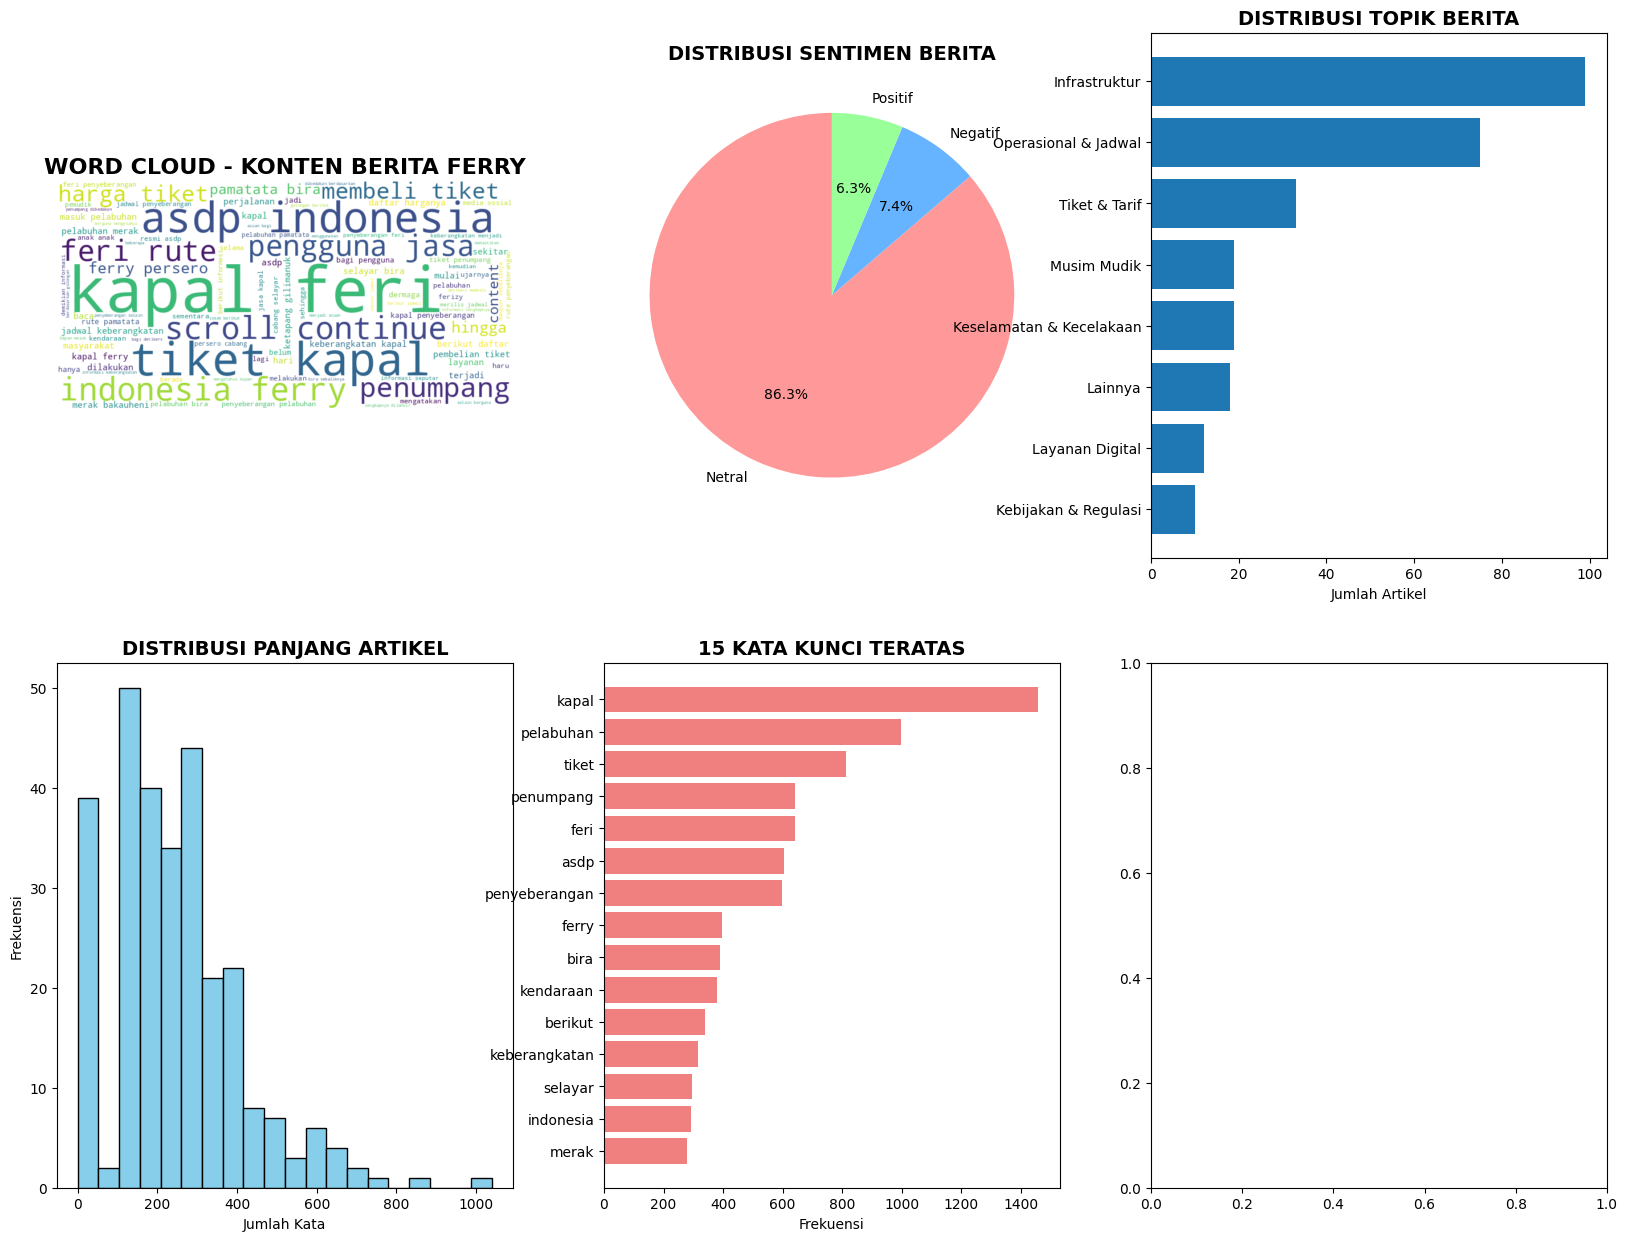

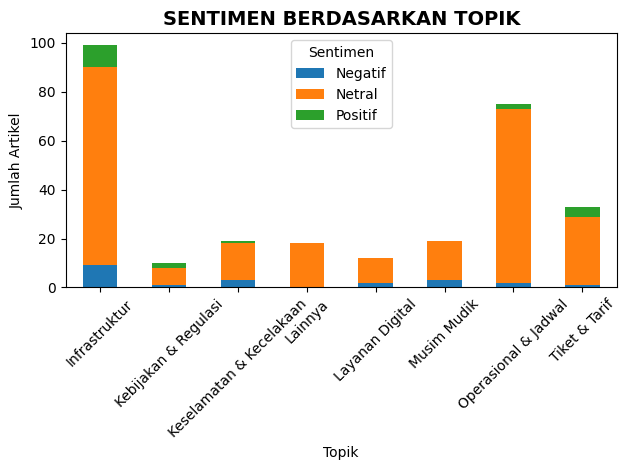


=== STATISTIK ANALISIS KONTEN ===
Total artikel berhasil di-scrape: 285
Rata-rata panjang artikel: 247 kata
Total kata yang dianalisis: 68,796

Distribusi Sentimen:
  Netral: 246 artikel (86.3%)
  Negatif: 21 artikel (7.4%)
  Positif: 18 artikel (6.3%)

Topik Paling Banyak Dibahas:
  Infrastruktur: 99 artikel (34.7%)
  Operasional & Jadwal: 75 artikel (26.3%)
  Tiket & Tarif: 33 artikel (11.6%)
  Musim Mudik: 19 artikel (6.7%)
  Keselamatan & Kecelakaan: 19 artikel (6.7%)

10 Kata Kunci Terpopuler:
  kapal: 1458 kali
  pelabuhan: 996 kali
  tiket: 813 kali
  penumpang: 643 kali
  feri: 640 kali
  asdp: 606 kali
  penyeberangan: 599 kali
  ferry: 395 kali
  bira: 389 kali
  kendaraan: 380 kali

=== ANALISIS MENDALAM PER TOPIK ===

Infrastruktur:
  Jumlah artikel: 99
  Rata-rata panjang: 269 kata
  Distribusi sentimen: {'Netral': np.int64(81), 'Positif': np.int64(9), 'Negatif': np.int64(9)}

Operasional & Jadwal:
  Jumlah artikel: 75
  Rata-rata panjang: 175 kata
  Distribusi sentimen: 

In [13]:
# ANALISIS TEKS BERITA YANG TELAH DI-SCRAPE
print("\n=== ANALISIS KONTEN BERITA ===")

# Filter hanya yang berhasil di-scrape
df_success = df_scraped[df_scraped['Scrape_Success'] == True].copy()

if len(df_success) > 0:
    # 1. ANALISIS SENTIMEN
    def analyze_sentiment(text):
        try:
            blob = TextBlob(text)
            polarity = blob.sentiment.polarity

            if polarity > 0.1:
                return 'Positif'
            elif polarity < -0.1:
                return 'Negatif'
            else:
                return 'Netral'
        except:
            return 'Netral'

    df_success['Sentimen'] = df_success['Content'].apply(analyze_sentiment)

    # 2. EKSTRAKSI TOPIK UTAMA
    def extract_main_topic(text):
        text_lower = text.lower()

        topic_keywords = {
            'Keselamatan & Kecelakaan': ['kebakaran', 'terbakar', 'kecelakaan', 'kandas', 'tenggelam', 'evakuasi', 'korban'],
            'Tiket & Tarif': ['tiket', 'tarif', 'harga', 'diskon', 'pemesanan', 'pembayaran'],
            'Operasional & Jadwal': ['jadwal', 'rute', 'operasi', 'berlayar', 'pelabuhan', 'keberangkatan'],
            'Layanan Digital': ['online', 'aplikasi', 'digital', 'ferizy', 'e-ticket', 'booking'],
            'Musim Mudik': ['mudik', 'lebaran', 'nataru', 'pemudik', 'arus balik', 'h-'],
            'Infrastruktur': ['kapal', 'pelabuhan', 'dermaga', 'terminal', 'fasilitas'],
            'Kebijakan & Regulasi': ['asdp', 'kemenhub', 'regulasi', 'kebijakan', 'sop']
        }

        scores = {topic: 0 for topic in topic_keywords.keys()}

        for topic, keywords in topic_keywords.items():
            for keyword in keywords:
                if keyword in text_lower:
                    scores[topic] += text_lower.count(keyword)

        if sum(scores.values()) == 0:
            return 'Lainnya'

        return max(scores, key=scores.get)

    df_success['Topik_Utama'] = df_success['Content'].apply(extract_main_topic)

    # 3. ANALISIS FREKUENSI KATA
    all_content = ' '.join(df_success['Content'].tolist())

    # Bersihkan teks
    def clean_text(text):
        text = re.sub(r'[^\w\s]', ' ', text)  # Hapus tanda baca
        text = re.sub(r'\d+', ' ', text)  # Hapus angka
        text = text.lower()
        return text

    cleaned_content = clean_text(all_content)
    words = cleaned_content.split()

    # Filter kata umum dan stopwords sederhana
    stopwords = ['yang', 'dan', 'di', 'dengan', 'untuk', 'pada', 'dari', 'dalam', 'ini', 'itu',
                 'adalah', 'atau', 'akan', 'tidak', 'dapat', 'ada', 'ke', 'dari', 'para', 'oleh',
                 'karena', 'jika', 'saat', 'serta', 'sebagai', 'masih', 'lebih', 'hal', 'bisa',
                 'seperti', 'juga', 'mereka', 'dia', 'kamu', 'kami', 'kita', 'saya', 'sudah',
                 'telah', 'setelah', 'sebelum', 'ketika', 'agar', 'bahwa', 'tersebut', 'namun',
                 'maka', 'waktu', 'tempat', 'satu', 'dua', 'tiga', 'orang', 'lain', 'semua',
                 'nya', 'itu', 'ini', 'saja', 'telah', 'untuk', 'dalam', 'oleh', 'kata', 'juga']

    filtered_words = [word for word in words if word not in stopwords and len(word) > 3]
    word_freq = Counter(filtered_words)

    # 4. VISUALISASI HASIL ANALISIS
    plt.figure(figsize=(20, 15))

    # Plot 1: Word Cloud
    plt.subplot(2, 3, 1)
    wordcloud = WordCloud(width=800, height=400, background_color='white',
                          colormap='viridis', max_words=100).generate(' '.join(filtered_words))
    plt.imshow(wordcloud, interpolation='bilinear')
    plt.axis('off')
    plt.title('WORD CLOUD - KONTEN BERITA FERRY', fontsize=16, fontweight='bold')

    # Plot 2: Distribusi Sentimen
    plt.subplot(2, 3, 2)
    sentiment_counts = df_success['Sentimen'].value_counts()
    colors = ['#ff9999', '#66b3ff', '#99ff99']
    plt.pie(sentiment_counts.values, labels=sentiment_counts.index, autopct='%1.1f%%',
            colors=colors, startangle=90)
    plt.title('DISTRIBUSI SENTIMEN BERITA', fontsize=14, fontweight='bold')

    # Plot 3: Distribusi Topik
    plt.subplot(2, 3, 3)
    topic_counts = df_success['Topik_Utama'].value_counts()
    plt.barh(range(len(topic_counts)), topic_counts.values)
    plt.yticks(range(len(topic_counts)), topic_counts.index)
    plt.xlabel('Jumlah Artikel')
    plt.title('DISTRIBUSI TOPIK BERITA', fontsize=14, fontweight='bold')
    plt.gca().invert_yaxis()

    # Plot 4: Panjang Artikel
    plt.subplot(2, 3, 4)
    plt.hist(df_success['Word_Count'], bins=20, color='skyblue', edgecolor='black')
    plt.title('DISTRIBUSI PANJANG ARTIKEL', fontsize=14, fontweight='bold')
    plt.xlabel('Jumlah Kata')
    plt.ylabel('Frekuensi')

    # Plot 5: Top Keywords
    plt.subplot(2, 3, 5)
    top_words = word_freq.most_common(15)
    words, counts = zip(*top_words)
    plt.barh(range(len(words)), counts, color='lightcoral')
    plt.yticks(range(len(words)), words)
    plt.xlabel('Frekuensi')
    plt.title('15 KATA KUNCI TERATAS', fontsize=14, fontweight='bold')
    plt.gca().invert_yaxis()

    # Plot 6: Sentimen vs Topik
    plt.subplot(2, 3, 6)
    sentiment_topic = pd.crosstab(df_success['Topik_Utama'], df_success['Sentimen'])
    sentiment_topic.plot(kind='bar', stacked=True)
    plt.title('SENTIMEN BERDASARKAN TOPIK', fontsize=14, fontweight='bold')
    plt.xlabel('Topik')
    plt.ylabel('Jumlah Artikel')
    plt.xticks(rotation=45)
    plt.legend(title='Sentimen')

    plt.tight_layout()
    plt.show()

    # 5. ANALISIS STATISTIK
    print("\n=== STATISTIK ANALISIS KONTEN ===")
    print(f"Total artikel berhasil di-scrape: {len(df_success)}")
    print(f"Rata-rata panjang artikel: {df_success['Word_Count'].mean():.0f} kata")
    print(f"Total kata yang dianalisis: {len(cleaned_content.split()):,}")

    print(f"\nDistribusi Sentimen:")
    for sentimen, count in sentiment_counts.items():
        percentage = (count / len(df_success)) * 100
        print(f"  {sentimen}: {count} artikel ({percentage:.1f}%)")

    print(f"\nTopik Paling Banyak Dibahas:")
    for topik, count in topic_counts.head(5).items():
        percentage = (count / len(df_success)) * 100
        print(f"  {topik}: {count} artikel ({percentage:.1f}%)")

    print(f"\n10 Kata Kunci Terpopuler:")
    for word, count in word_freq.most_common(10):
        print(f"  {word}: {count} kali")

    # 6. ANALISIS MENDALAM PER TOPIK
    print("\n=== ANALISIS MENDALAM PER TOPIK ===")
    for topik in topic_counts.index:
        topik_df = df_success[df_success['Topik_Utama'] == topik]
        sentimen_topik = topik_df['Sentimen'].value_counts()

        print(f"\n{topik}:")
        print(f"  Jumlah artikel: {len(topik_df)}")
        print(f"  Rata-rata panjang: {topik_df['Word_Count'].mean():.0f} kata")
        print(f"  Distribusi sentimen: {dict(sentimen_topik)}")

    # 7. EXPORT HASIL ANALISIS
    with pd.ExcelWriter('hasil_analisis_berita_ferry.xlsx') as writer:
        df_success.to_excel(writer, sheet_name='Data Berita', index=False)

        # Summary statistics
        summary_data = {
            'Metric': [
                'Total Artikel Di-scrape', 'Artikel Berhasil', 'Success Rate',
                'Rata-rata Panjang Artikel', 'Total Kata Dianalisis',
                'Sentimen Positif', 'Sentimen Negatif', 'Sentimen Netral',
                'Topik Terpopuler'
            ],
            'Value': [
                len(df_scraped), len(df_success), f"{success_rate:.1f}%",
                f"{df_success['Word_Count'].mean():.0f} kata",
                f"{len(cleaned_content.split()):,}",
                f"{sentiment_counts.get('Positif', 0)} artikel",
                f"{sentiment_counts.get('Negatif', 0)} artikel",
                f"{sentiment_counts.get('Netral', 0)} artikel",
                topic_counts.index[0] if len(topic_counts) > 0 else 'N/A'
            ]
        }
        summary_df = pd.DataFrame(summary_data)
        summary_df.to_excel(writer, sheet_name='Summary', index=False)

        # Frekuensi kata
        word_freq_df = pd.DataFrame(word_freq.most_common(50), columns=['Kata', 'Frekuensi'])
        word_freq_df.to_excel(writer, sheet_name='Frekuensi Kata', index=False)

        # Analisis topik
        topic_analysis = df_success['Topik_Utama'].value_counts().reset_index()
        topic_analysis.columns = ['Topik', 'Jumlah Artikel']
        topic_analysis.to_excel(writer, sheet_name='Analisis Topik', index=False)

    print(f"\n=== ANALISIS SELESAI ===")
    print(f"File hasil analisis disimpan sebagai 'hasil_analisis_berita_ferry.xlsx'")

else:
    print("Tidak ada artikel yang berhasil di-scrape untuk dianalisis.")

# 8. REKOMENDASI BERDASARKAN TEMUAN
if len(df_success) > 0:
    print("\n=== REKOMENDASI STRATEGIS ===")

    top_topic = topic_counts.index[0]
    dominant_sentiment = sentiment_counts.index[0]
    avg_word_count = df_success['Word_Count'].mean()

    print(f"Berdasarkan analisis {len(df_success)} artikel berita:")
    print(f"1. FOKUS PADA {top_topic.upper()}: Topik ini paling banyak dibahas media")
    print(f"2. SENTIMEN {dominant_sentiment.upper()}: Perlu strategi komunikasi yang sesuai")
    print(f"3. KEDALAMAN BERITA: Rata-rata {avg_word_count:.0f} kata per artikel menunjukkan tingkat detail pemberitaan")

    # Rekomendasi spesifik berdasarkan topik
    if 'Keselamatan' in top_topic:
        print("4. PRIORITASKAN KESELAMATAN: Tingkatkan standar keamanan dan komunikasi transparan")
    elif 'Tiket' in top_topic:
        print("4. OPTIMALKAN SISTEM TIKET: Permudah akses dan transparansi harga")
    elif 'Digital' in top_topic:
        print("4. PERKUAT DIGITALISASI: Kembangkan layanan online yang user-friendly")